# MNIST - Categorical Classification
> # Model Capacity
## Import Tensorflow & Keras

In [1]:
import warnings
warnings.filterwarnings('ignore')

* TensorFlow Version 지정

In [2]:
# %tensorflow_version 1.x
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# I. MNIST Data_Set Load

In [4]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

* Normalization

In [6]:
train_images = train_images.astype(float) / 255
test_images = test_images.astype(float) / 255

> ## 2) One Hot Encoding

In [7]:
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 1개의 Hidden Layer & 256개의 Nodes
 - Model Capacity 낮게 조정

In [8]:
from keras import models
from keras import layers

mnist = models.Sequential()
mnist.add(layers.Dense(256, activation = 'relu', input_shape=(28 * 28,)))
mnist.add(layers.Dense(10, activation = 'softmax'))

* 모델 구조 확인

In [9]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [10]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 모델 학습 수행(약 2분)

In [11]:
Hist_mnist = mnist.fit(train_images, train_labels,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 15s 4ms/step - loss: 0.5172 - accuracy: 0.8559 - val_loss: 0.1669 - val_accuracy: 0.9532
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 0.1537 - accuracy: 0.9557 - val_loss: 0.1179 - val_accuracy: 0.9648
Epoch 3/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0986 - accuracy: 0.9703 - val_loss: 0.1096 - val_accuracy: 0.9695
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0710 - accuracy: 0.9791 - val_loss: 0.0875 - val_accuracy: 0.9749
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0536 - accuracy: 0.9845 - val_loss: 0.0853 - val_accuracy: 0.9753
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0417 - accuracy: 0.9887 - val_loss: 0.0850 - val_accuracy: 0.9748
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 0.0358 - accuracy: 0.9907 - val_loss: 0.0794 - val_accuracy: 0.977

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

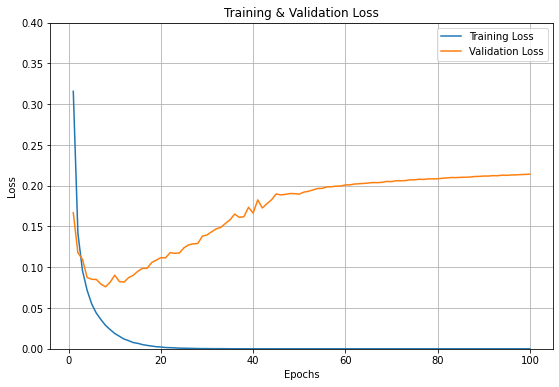

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
plt.ylim(0, 0.4)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [13]:
loss, accuracy = mnist.evaluate(test_images, test_labels)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.1688 - accuracy: 0.9820
Loss = 0.16882
Accuracy = 0.98200


# 
# 
# 
# The End
# 
# 
# 